In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
sns.set_style("darkgrid")

In [36]:
df = pd.read_csv('car data.csv')

In [37]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [38]:
df.shape

(301, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [41]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Preprocessing

In [42]:
df['Age'] = 2021 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [43]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [44]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Past_Owners'}, inplace=True)

In [45]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [46]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

# Visualizing the data

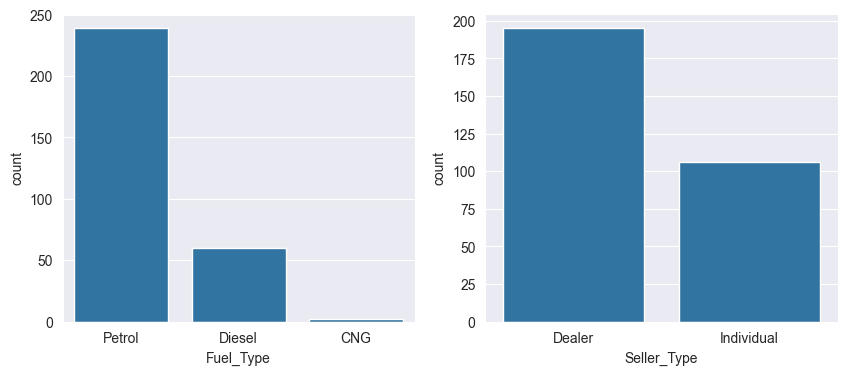

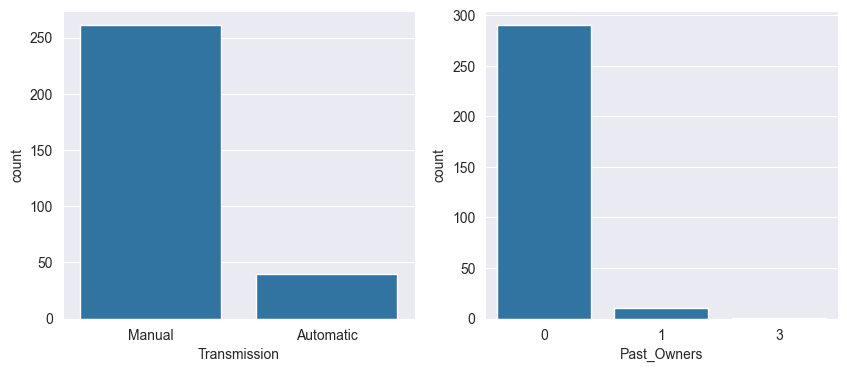

In [47]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i +=1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

In [48]:
df[df['Present_Price(lacs)']>df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [49]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [50]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


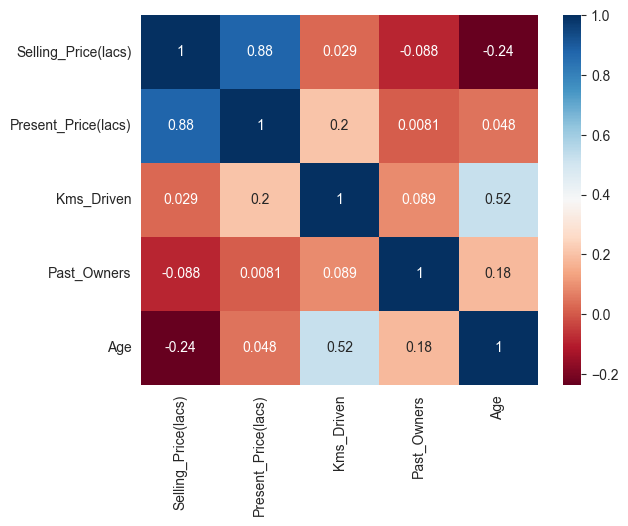

In [51]:
# Check for non-numeric values
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = df.drop(non_numeric_cols, axis=1)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.show()

In [52]:
df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [53]:
# df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns='Fuel_Type')

In [54]:
# Creating dummies for categorical values
# df.drop(labels='Car_Name', axis=1, inplace = True)

In [55]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age
0,3.35,5.59,27000,0,7
1,4.75,9.54,43000,0,8
2,7.25,9.85,6900,0,4
3,2.85,4.15,5200,0,10
4,4.60,6.87,42450,0,7


In [56]:
df = pd.get_dummies(data=df, drop_first=True)

In [57]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age
0,3.35,5.59,27000,0,7
1,4.75,9.54,43000,0,8
2,7.25,9.85,6900,0,4
3,2.85,4.15,5200,0,10
4,4.60,6.87,42450,0,7


# Train - Test - Split 

In [58]:
# Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [59]:
print(X)

[[5.5900e+00 2.7000e+04 0.0000e+00 7.0000e+00]
 [9.5400e+00 4.3000e+04 0.0000e+00 8.0000e+00]
 [9.8500e+00 6.9000e+03 0.0000e+00 4.0000e+00]
 ...
 [1.1000e+01 8.7934e+04 0.0000e+00 1.2000e+01]
 [1.2500e+01 9.0000e+03 0.0000e+00 4.0000e+00]
 [5.9000e+00 5.4640e+03 0.0000e+00 5.0000e+00]]


In [60]:
# print(y)

In [61]:
print(X.shape, y.shape)

(301, 4) (301, 1)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Scaling the data for better training

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(301, 4) (240, 4) (61, 4)


In [65]:
print(y.shape, y_train.shape, y_test.shape)

(301, 1) (240, 1) (61, 1)


# Building Artifical Neural Network 

- R Squared : R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Input

# Load the dataset
df = pd.read_csv('car data.csv')

# Separate features (X) and target variable (y)
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer, no activation function for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Predict on training and testing sets
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Calculate R^2 score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R^2 score for training set (ANN):", r2_train)
print("R^2 score for testing set (ANN):", r2_test)

import joblib
import pickle
XB_pkl_filename = 'Annmodel.pkl'
# Open the file to save as pkl file
AnnModel = open(XB_pkl_filename, 'wb')
pickle.dump(model, AnnModel)
# Close the pickle instances
AnnModel.close()

2/2 [==============================] - 0s 8ms/step
R^2 score for training set (ANN): 0.9894967451155213
R^2 score for testing set (ANN): 0.9766418267360202
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-03-29 11:59:34         1780
metadata.json                                  2024-03-29 11:59:34           64
variables.h5                                   2024-03-29 11:59:34       133008


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('car data.csv')

# Separate features (X) and target variable (y)
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Dropping 'Car_Name' as it is not useful for prediction
y = df['Selling_Price']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with modified max_depth
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42) # Increase max_depth
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R^2 score for training set:", r2_train)
print("R^2 score for testing set:", r2_test)


R^2 score for training set: 0.9603162290934475
R^2 score for testing set: 0.9275526870707972


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('car data.csv')

# Separate features (X) and target variable (y)
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Dropping 'Car_Name' as it is not useful for prediction
y = df['Selling_Price']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate R^2 score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R^2 score for training set (Linear Regression):", r2_train)
print("R^2 score for testing set (Linear Regression):", r2_test)


R^2 score for training set (Linear Regression): 0.8886517300804564
R^2 score for testing set (Linear Regression): 0.8489813024897536
